Vamos realizar uma investigação nos salários dos servidores públicos do Estado de São Paulo.
Queremos compreender qual é o real problema relacionado ao funcionalismo público, se é a quantidade de trabalhadores, salários, cargos, o que realmente acontece.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [6]:
df_publico = pd.read_csv('publico.txt', sep=';', encoding='latin1')
#df_federal = pd.read_csv('federal.csv')

Vamos analisar um dataset extraído do site https://www.transparencia.sp.gov.br/Home/Servidor. Este dataset se trata do período 01/2024 e contém todos os salários dos Servidores Públicos do Estado de São Paulo por Órgão, Cargo, Grupo.
Ele contém 1.078.602 linhas.

In [7]:
df_publico.head()

,NOME,CARGO,ORGÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$),GRUPO
0,AAIRON TELES DE CAMARGO,OFICIAL ADMINISTRATIVO,DEPT.ESTAD.TRANSITO DETRAN SP,"3070,60","0,00","0,00","0,00","167,76","0,00","1686,65",ATIVOS
1,AALAN DA SILVA ARAUJO,SD 1C PM,POLICIA MILITAR SAO PAULO,"5305,87","0,00","0,00","0,00","954,72","0,00","2980,70",ATIVOS
2,AARAN ESTEVAO LIMA BARBOSA,CAP PM,POLICIA MILITAR SAO PAULO,"16658,13","0,00","0,00","0,00","247,52","0,00","8573,41",ATIVOS
3,AARAO DE OLIVEIRA,MAJ PM,SAO PAULO PREVIDENCIA SPPREV,"22284,34","0,00","0,00","0,00","0,00","0,00","20461,50",APOSENTADOS
4,AARAO HENRIQUE OLIVEIRA,AG. ESCOLTA E VIGILANCIA PENIT,SECRET.ADMINISTR.PENITENCIARIA,"3893,37","0,00","0,00","0,00","112,78","0,00","2640,79",ATIVOS


In [8]:
df_publico.describe()

,NOME,CARGO,ORGÃO,REMUNERAÇÃO DO MÊS,FÉRIAS E 13º SALÁRIO,PAGAMENTOS EVENTUAIS,LICENÇA PRÊMIO INDENIZADA,ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,REDUTOR SALARIAL,TOTAL LIQUÍDO (R$),GRUPO
count,1022187,1021816,1022187,1022187,1022187,1022187,1022187,1022187,1022187,1022187,1022187
unique,915305,2828,78,370607,128329,51710,2119,41724,8890,593740,3
top,MARIA APARECIDA DA SILVA,PROFESSOR EDUCA O B SICA II,SAO PAULO PREVIDENCIA SPPREV,"8146,24","0,00","0,00","0,00","0,00","0,00","0,00",ATIVOS
freq,292,92181,492030,10971,713391,922896,1018415,810853,1011276,11261,496603


In [9]:
# remove NOME, REMUNERAÇÃO DO MÊS,	FÉRIAS E 13º SALÁRIO,	PAGAMENTOS EVENTUAIS,	LICENÇA PRÊMIO INDENIZADA,	ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES,	REDUTOR SALARIAL
df_publico = df_publico.drop(['NOME', 'REMUNERAÇÃO DO MÊS', 'FÉRIAS E 13º SALÁRIO', 'PAGAMENTOS EVENTUAIS', 'LICENÇA PRÊMIO INDENIZADA', 'ABONO PERMANÊNCIA & OUTRAS INDENIZAÇÕES', 'REDUTOR SALARIAL'], axis=1)

In [10]:
# rename CARGO -> cargo, ÓRGÃO -> orgao, TOTAL LIQUÍDO (R$) -> remuneracao_apos_deducoes, GRUPO -> situacao
df_publico.rename(columns={'CARGO': 'cargo', 'ORGÃO': 'orgao', 'TOTAL LIQUÍDO (R$)': 'remuneracao_apos_deducoes', 'GRUPO': 'situacao'}, inplace=True)

In [11]:
df_publico.head()

,cargo,orgao,remuneracao_apos_deducoes,situacao
0,OFICIAL ADMINISTRATIVO,DEPT.ESTAD.TRANSITO DETRAN SP,"1686,65",ATIVOS
1,SD 1C PM,POLICIA MILITAR SAO PAULO,"2980,70",ATIVOS
2,CAP PM,POLICIA MILITAR SAO PAULO,"8573,41",ATIVOS
3,MAJ PM,SAO PAULO PREVIDENCIA SPPREV,"20461,50",APOSENTADOS
4,AG. ESCOLTA E VIGILANCIA PENIT,SECRET.ADMINISTR.PENITENCIARIA,"2640,79",ATIVOS


Tratamento de Dados


*   Substituição de nulos para OUTROS na coluna Cargo
*   Formatação da coluna remuneracao_apos_deducoes que estava no formato de string para float




In [12]:
df_publico.isna().sum()

cargo                        371
orgao                          0
remuneracao_apos_deducoes      0
situacao                       0
dtype: int64

In [13]:
#fill na gargo's with 'OUTROS'
df_publico['cargo'] = df_publico['cargo'].fillna('OUTROS')

In [14]:
df_publico.isna().sum()

cargo                        0
orgao                        0
remuneracao_apos_deducoes    0
situacao                     0
dtype: int64

In [15]:
df_publico.dtypes

cargo                        object
orgao                        object
remuneracao_apos_deducoes    object
situacao                     object
dtype: object

In [16]:
# format remuneracao_apos_deducoes to float
df_publico['remuneracao_apos_deducoes'] = df_publico['remuneracao_apos_deducoes'].str.replace('.', '')
df_publico['remuneracao_apos_deducoes'] = df_publico['remuneracao_apos_deducoes'].str.replace(',', '.')
df_publico = df_publico[~df_publico['remuneracao_apos_deducoes'].str.contains('-')]
df_publico['remuneracao_apos_deducoes'] = df_publico['remuneracao_apos_deducoes'].astype(float)

In [17]:
df_publico[df_publico['remuneracao_apos_deducoes'] < 0].count()

cargo                        0
orgao                        0
remuneracao_apos_deducoes    0
situacao                     0
dtype: int64

Nota-se que a representação gráfica de remuneração por orgão está dimensionada, isto, por conta dos valores fora da curva, entretanto, é possivel ver que a grande maioria esta concentrada abaixo de 100mil e que o teto é de um pouco mais de 500mil.

Segundo a legislação o teto salarial do funcionalismo publico é medido a partir do salário dos ministros do STF, onde, um funcionário não pode receber mais que o salário de um ministro, que no mês de fevereiro de 2024 equivale a 46.366,19, porem, nesse caso temos pessoas recebendo acima desse valor.

A seguir vamos observar esses pontos fora da curva para entender onde estão localizados e qual sua representatividade

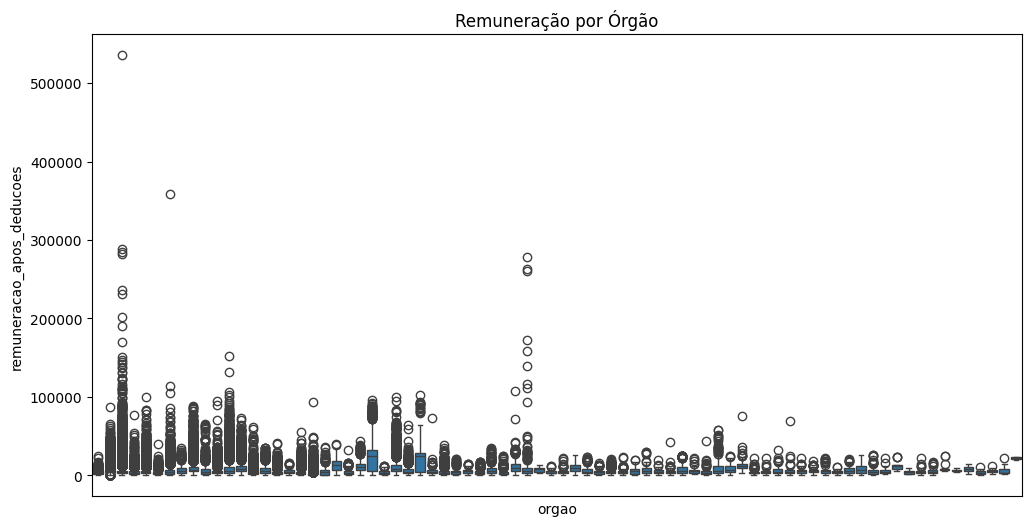

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='orgao', y='remuneracao_apos_deducoes', data=df_publico)
plt.xticks([])
plt.title('Remuneração por Órgão')
plt.show()

In [19]:
outliers = df_publico[df_publico['remuneracao_apos_deducoes'] > 100000]

In [20]:
outliers.describe()

,remuneracao_apos_deducoes
count,50.000000
mean,162274.387400
std,83272.314351
min,100048.710000
25%,109940.547500
50%,131184.835000
75%,171381.547500
max,535210.130000


Observando os pontos fora da curva conseguimos encontrar quais os orgãos que concentram os maiores salários.

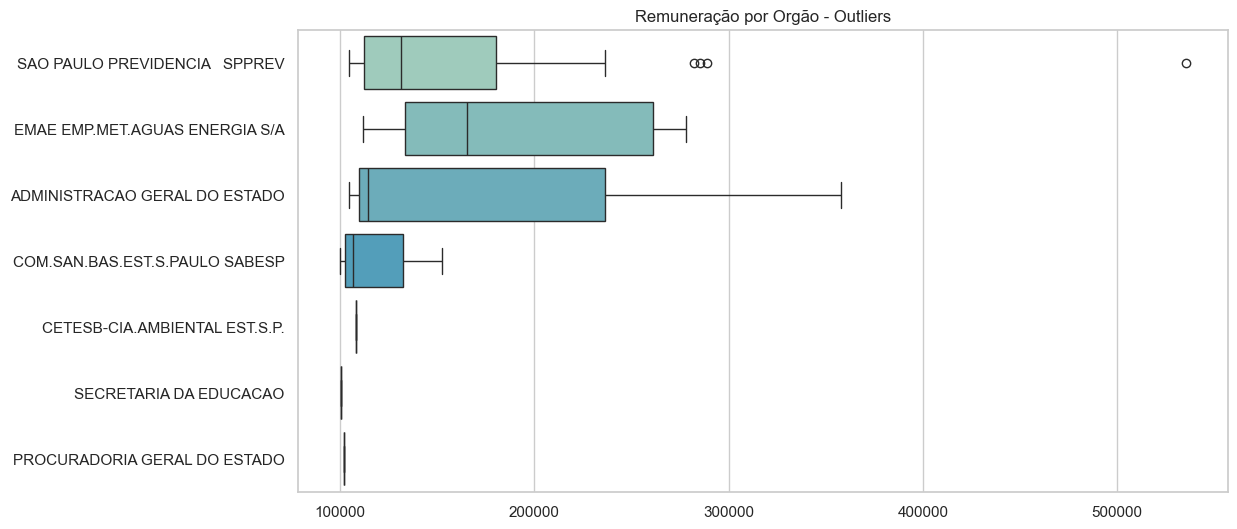

In [21]:
# plot remuneracao_apos_deducoes
sns.set(style='whitegrid')
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x='remuneracao_apos_deducoes', y='orgao', data=outliers, hue='orgao', palette='GnBu_d')
ax.set_ylabel(None)
ax.set_xlabel(None)
plt.title('Remuneração por Orgão - Outliers')
plt.show()

In [22]:
outliers.count()

cargo                        50
orgao                        50
remuneracao_apos_deducoes    50
situacao                     50
dtype: int64

In [23]:
# sum of remuneracao_apos_deducoes for outliers
total_outliers = outliers['remuneracao_apos_deducoes'].sum()
print(total_outliers)

8113719.370000001


In [24]:
# sum of remuneracao_apos_deducoes for all
total = df_publico['remuneracao_apos_deducoes'].sum()


Apesar de encontrarmos aqueles com o maior salário, eles não possuem uma grande representatividade no total, são apenas 50 pessoas que representão 1% da soma dos salarios.

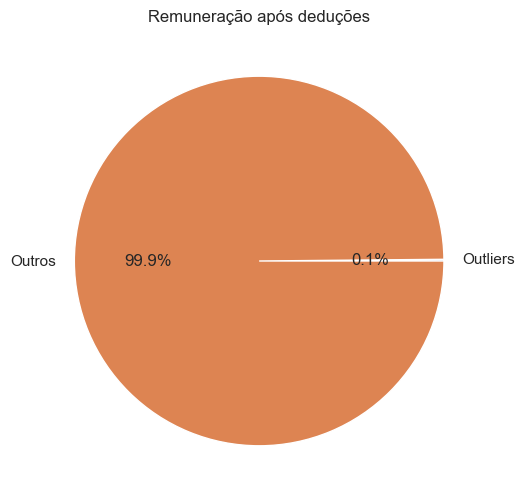

In [25]:
plt.figure(figsize=(12, 6))
plt.pie([total_outliers, total-total_outliers], labels=['Outliers', 'Outros'], autopct='%1.1f%%')
plt.title('Remuneração após deduções')
plt.show()

Agora que sabemos que os outliers não representam grande parte da soma dos salários, vamos tentar uma nova abordagem, agrupando o valor total de salários por grupo.

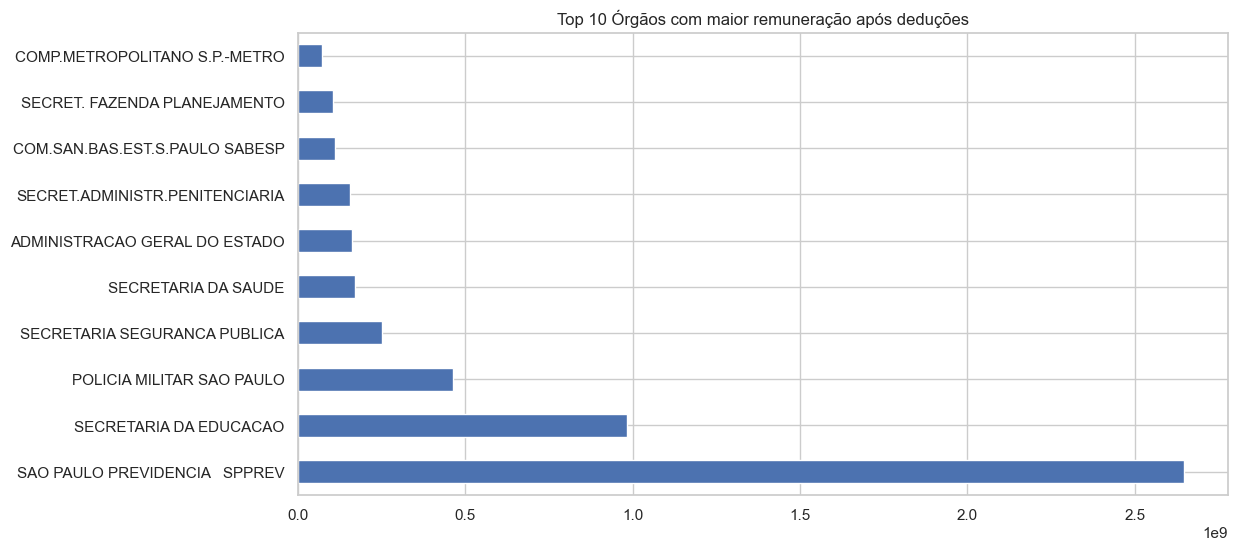

In [26]:
group_orgao = df_publico.groupby('orgao')['remuneracao_apos_deducoes']
top10 = group_orgao.sum().nlargest(10)
ax = top10.plot(kind='barh', figsize=(12, 6))
ax.set_ylabel(None)
plt.title('Top 10 Órgãos com maior remuneração após deduções')
plt.show()

 SPPREV é responsável por administrar o salário dos aposentados e pensionistas da administração direta e indireta do Estado de São Paulo, bem como da Assembléia Legislativa, do Tribunal de Contas, das universidades, do poder Judiciário, do Ministério Público e da Defensoria Pública.

In [27]:
spprev = df_publico[df_publico['orgao'] == 'SAO PAULO PREVIDENCIA   SPPREV']

In [28]:
spprev.shape

(492030, 4)

In [29]:
aposentados_pensionistas = df_publico[(df_publico['situacao'] == 'APOSENTADOS') | (df_publico['situacao'] == 'PENSIONISTAS')]

In [30]:
aposentados_pensionistas.count()

cargo                        525544
orgao                        525544
remuneracao_apos_deducoes    525544
situacao                     525544
dtype: int64

Quase 100% dos funcionários atrelados ao órgão SAO PAULO PREVIDENCIA SPPREV se tratam de APOSENTADOS e PENSIONISTAS

In [32]:
spprev['situacao'].value_counts()

situacao
APOSENTADOS     366646
PENSIONISTAS    125043
ATIVOS             341
Name: count, dtype: int64

Observamos que quase metade do dataset se trata de dados do Órgão SAO PAULO PREVIDENCIA   SPPREV

In [34]:
spprev.shape

(492030, 4)

A partir da agrupagem podemos ver o orgão SPPREV acumulando 2.6Bi com salarios, o que representa quase a metade da soma total de salários

In [33]:
total_spprev = spprev['remuneracao_apos_deducoes'].sum()
print(total_spprev)

2646059757.4400005


A somatória dos salários do dataset completo chega a quase 6Bi

In [35]:
# sum of remuneracao_apos_deducoes for all
print(total)

5514712797.540002


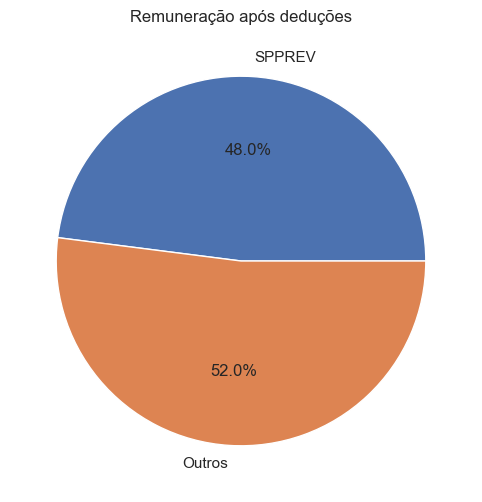

In [36]:
plt.figure(figsize=(12, 6))
plt.pie([total_spprev, total-total_spprev], labels=['SPPREV', 'Outros'], autopct='%1.1f%%')
plt.title('Remuneração após deduções')
plt.show()

De acordo com dados do INSS, o número de benefícios previdenciários passou de 39 milhões. O número de benefícios destinados a aposentadorias, pensões e demais auxílios chegou a 39.036.865 em novembro deste ano ante 38.901.879 de outubro.

Do total, 5.657.745 são benefícios assistenciais, e 33.379.120, previdenciários. Os números fazem parte da folha de pagamento do INSS de novembro.

Ainda conforme o levantamento, o número de pessoas que recebem até um salário mínimo (R$ 1.320) é de 26.168.062. Os que ganham acima do piso nacional somam 12.868.803 pessoas.